In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [4]:
skew_values = df[num_cols].skew().sort_values(ascending=False)

print("Skewness Values:\n")
print(skew_values)

Skewness Values:

Discount_offered       1.798929
Prior_purchases        1.681897
Customer_care_calls    0.391926
Customer_rating        0.004360
ID                     0.000000
Cost_of_the_Product   -0.157117
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64


In [5]:
for col, val in skew_values.items():
    if val > 1:
        print(f"{col} → Highly Right Skewed")
    elif val > 0.5:
        print(f"{col} → Moderately Right Skewed")
    elif val < -1:
        print(f"{col} → Highly Left Skewed")
    elif val < -0.5:
        print(f"{col} → Moderately Left Skewed")
    else:
        print(f"{col} → Approximately Normal")

Discount_offered → Highly Right Skewed
Prior_purchases → Highly Right Skewed
Customer_care_calls → Approximately Normal
Customer_rating → Approximately Normal
ID → Approximately Normal
Cost_of_the_Product → Approximately Normal
Weight_in_gms → Approximately Normal
Reached.on.Time_Y.N → Approximately Normal


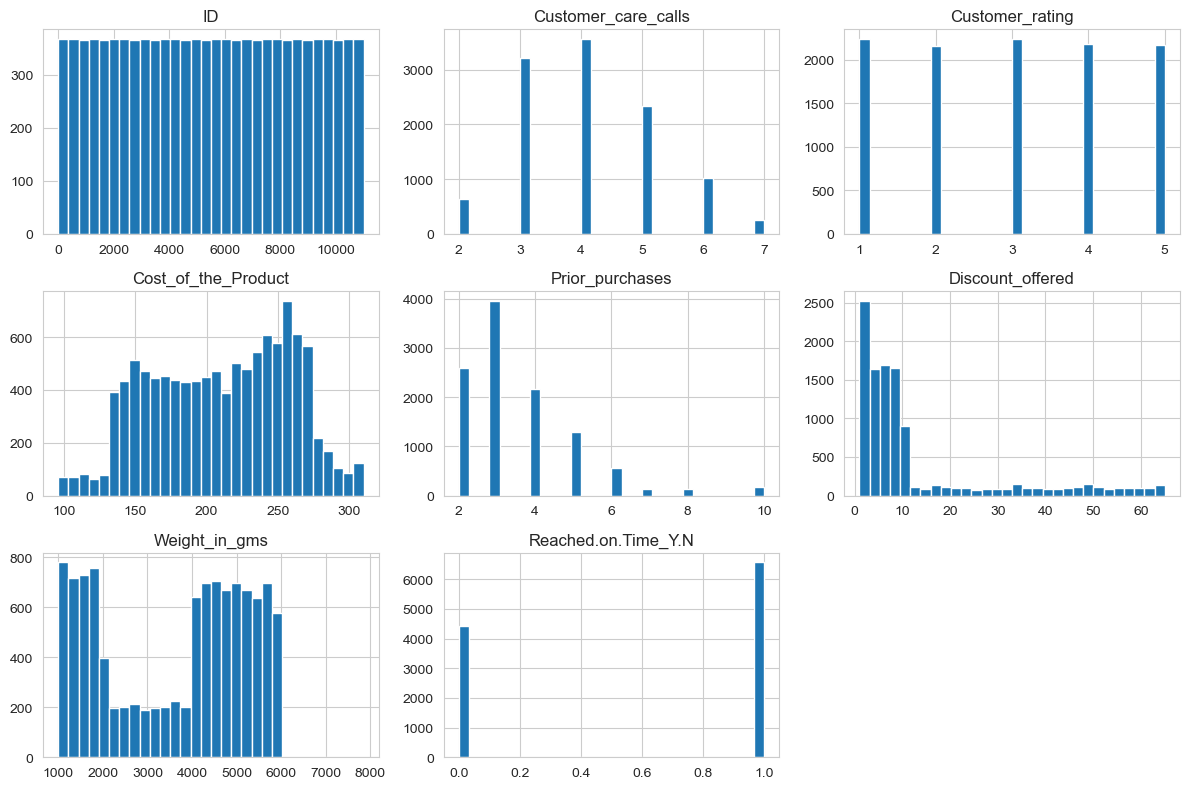

In [6]:
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

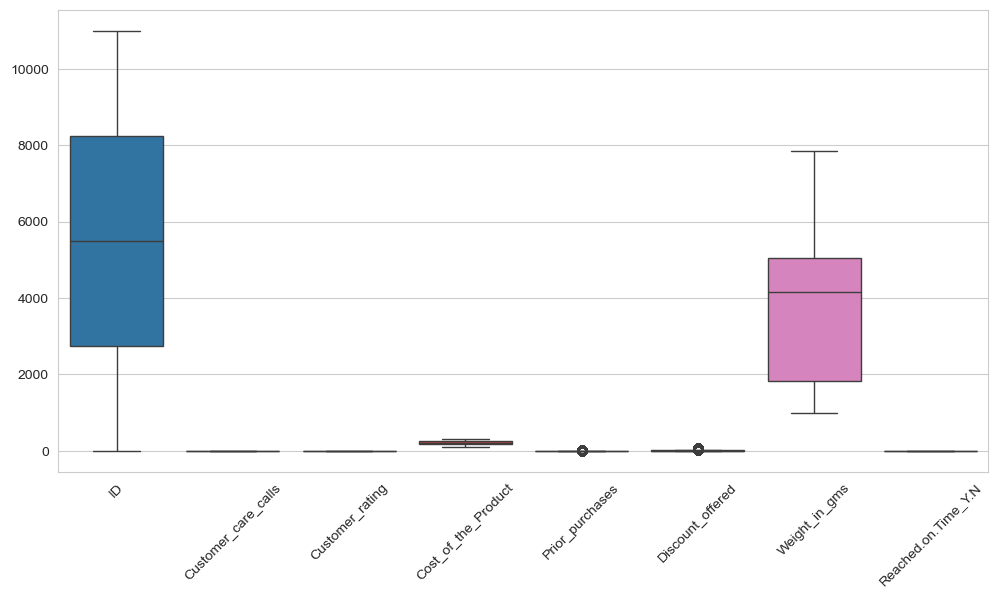

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()

In [8]:
right_skewed = skew_values[skew_values > 1].index

for col in right_skewed:
    df[col] = np.log1p(df[col])

In [9]:
print(df[right_skewed].skew())

Discount_offered    0.532220
Prior_purchases     0.666819
dtype: float64
